## Project Name : Temperature Forecast Project using ML

# Dataset Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. 

This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. 

There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [3]:
                                          ''' Importing libraries '''

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
df.shape

(7752, 25)

In [7]:
                                          ''' Finding the Null Values '''

df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

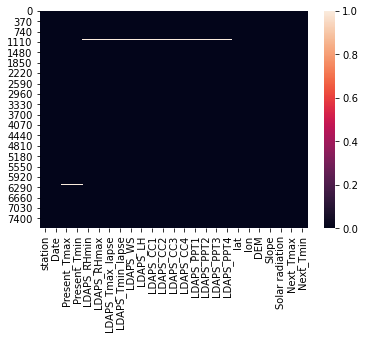

In [8]:
sns.heatmap(df.isnull())

In [9]:
                                          ''' Dropping the Null Values '''
    
df.dropna(how='any',inplace=True)

In [10]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

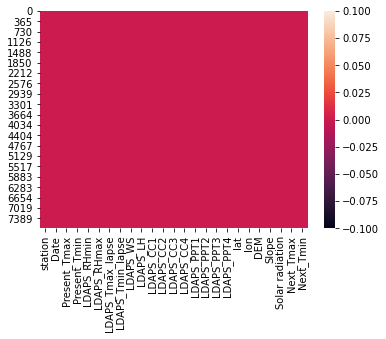

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isna().values.any()

False

This verifies we have no null values in the dataset.

### Feature Engineering:

In [13]:
                                   ''' Converting the Date column into date-time format '''
    
# We are creating new columns as "Year", "Month", Day".

df["Year"] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.year
df["Month"] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.month
df["Day"] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.day

In [14]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Year                  int64
Month                 int64
Day                   int64
dtype: object

In [15]:
                                          ''' Dropping the "Date" column '''
    
df.drop(['Date'],axis=1,inplace=True)

### Visualization:

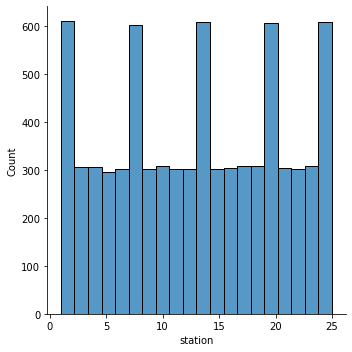

In [19]:
sns.displot(df['station'])

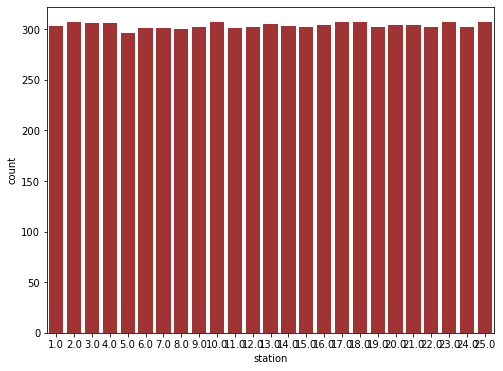

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(x="station", data=df, color="firebrick")
plt.show()

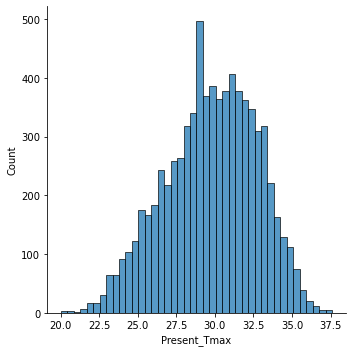

In [21]:
sns.displot(df['Present_Tmax'])

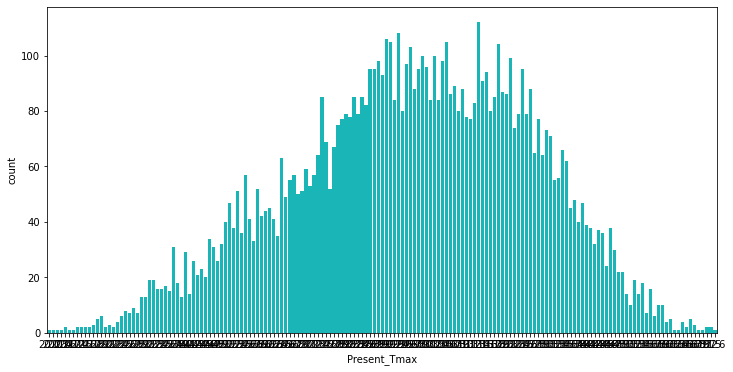

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x="Present_Tmax", data=df, color="darkturquoise")
plt.show()

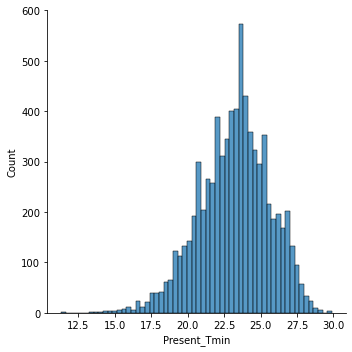

In [22]:
sns.displot(df['Present_Tmin'])

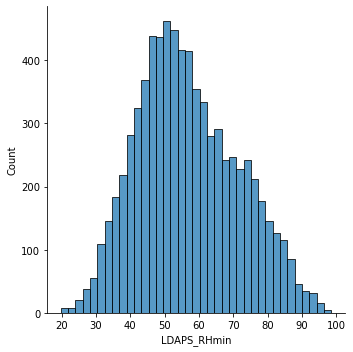

In [23]:
sns.displot(df['LDAPS_RHmin'])

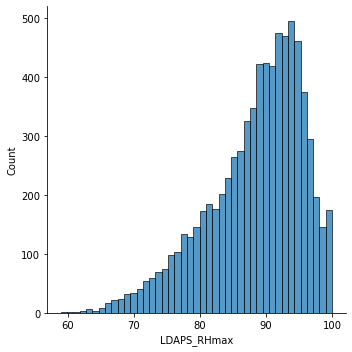

In [24]:
sns.displot(df['LDAPS_RHmax'])

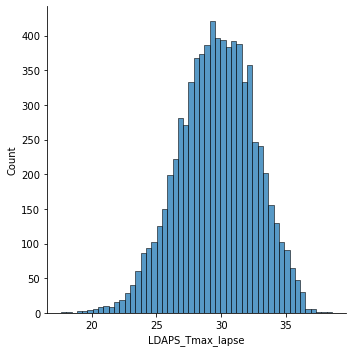

In [25]:
sns.displot(df['LDAPS_Tmax_lapse'])

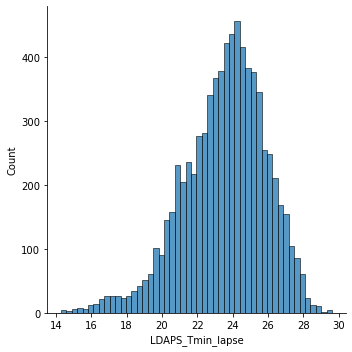

In [26]:
sns.displot(df['LDAPS_Tmin_lapse'])

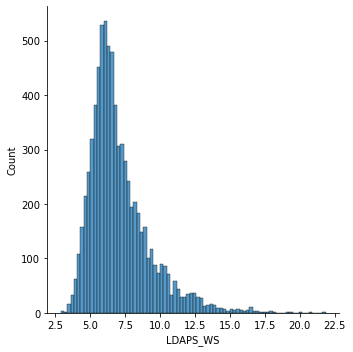

In [27]:
sns.displot(df['LDAPS_WS'])

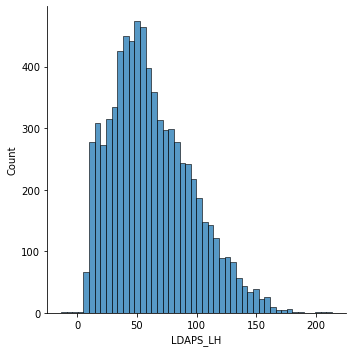

In [28]:
sns.displot(df['LDAPS_LH'])

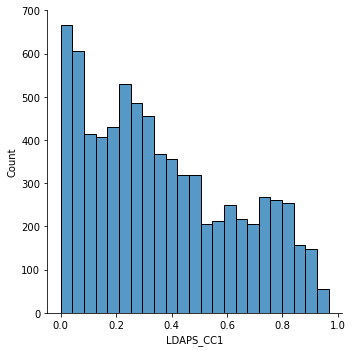

In [29]:
sns.displot(df['LDAPS_CC1'])

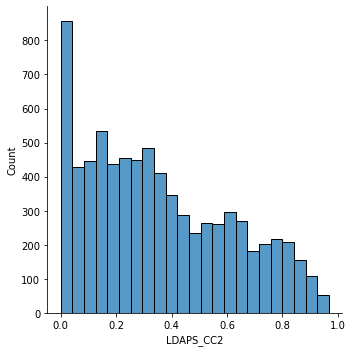

In [30]:
sns.displot(df['LDAPS_CC2'])

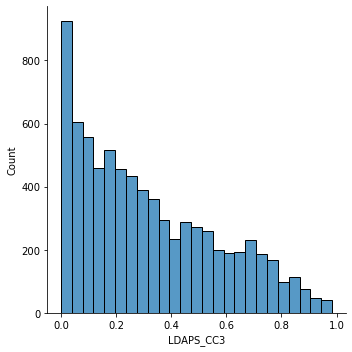

In [31]:
sns.displot(df['LDAPS_CC3'])

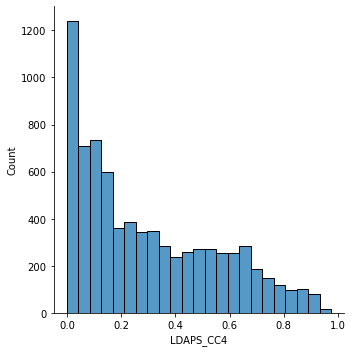

In [32]:
sns.displot(df['LDAPS_CC4'])

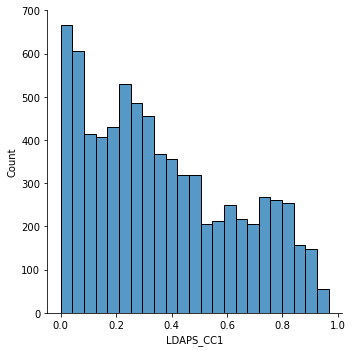

In [33]:
sns.displot(df['LDAPS_CC1'])

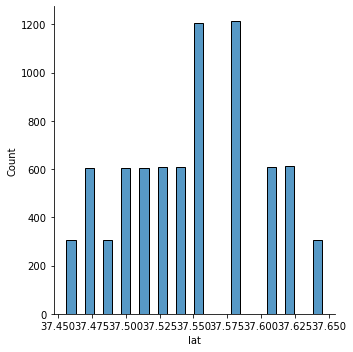

In [34]:
sns.displot(df['lat'])

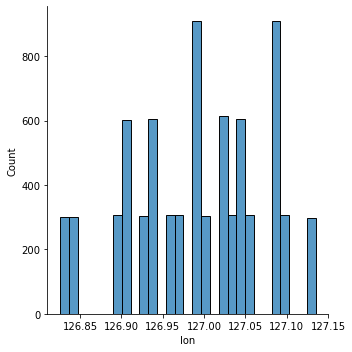

In [35]:
sns.displot(df['lon'])

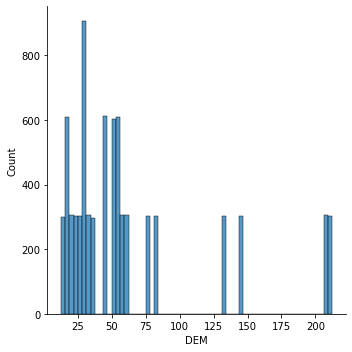

In [36]:
sns.displot(df['DEM'])

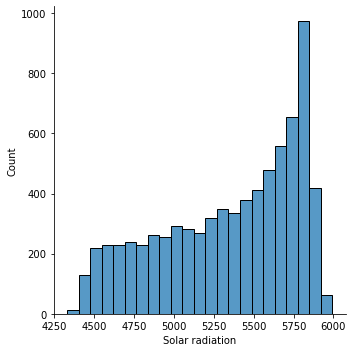

In [37]:
sns.displot(df['Solar radiation'])

<AxesSubplot:xlabel='Solar radiation'>

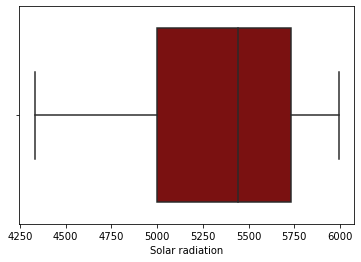

In [56]:
sns.boxplot(df['Solar radiation'], color='darkred')

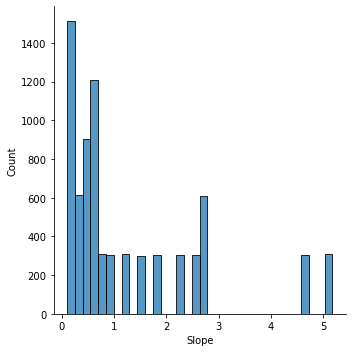

In [39]:
sns.displot(df['Slope'])

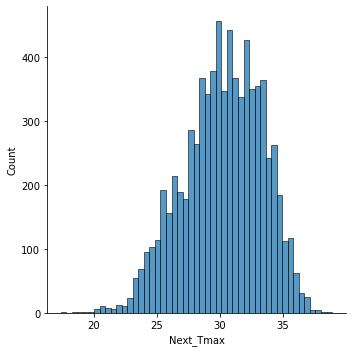

In [40]:
sns.displot(df['Next_Tmax'])

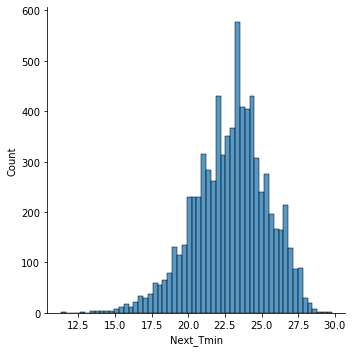

In [41]:
sns.displot(df['Next_Tmin'])

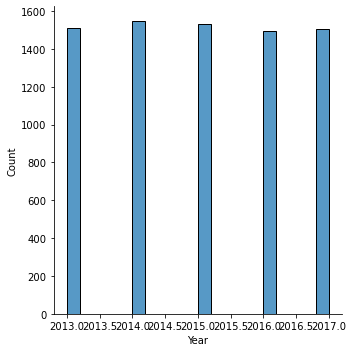

In [42]:
sns.displot(df['Year'])

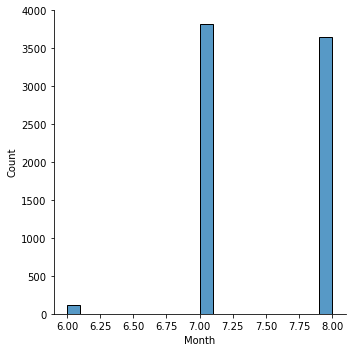

In [43]:
sns.displot(df['Month'])

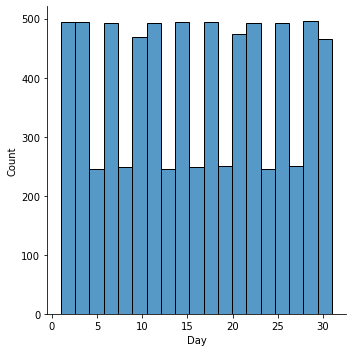

In [44]:
sns.displot(df['Day'])

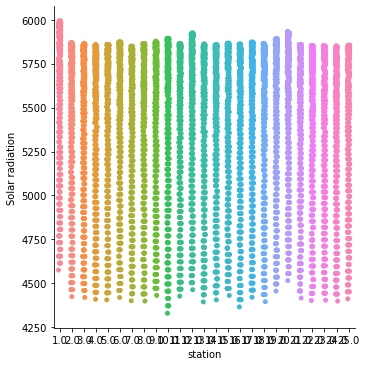

In [60]:
sns.catplot(x ="station", y ="Solar radiation", data = df)
plt.show()

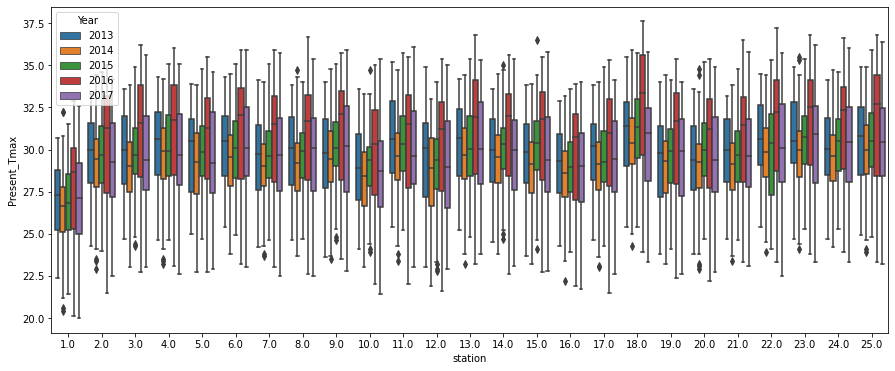

In [62]:
plt.figure(figsize=(15,6))
sns.boxplot(x='station',y='Present_Tmax',hue='Year',data=df)
plt.show()

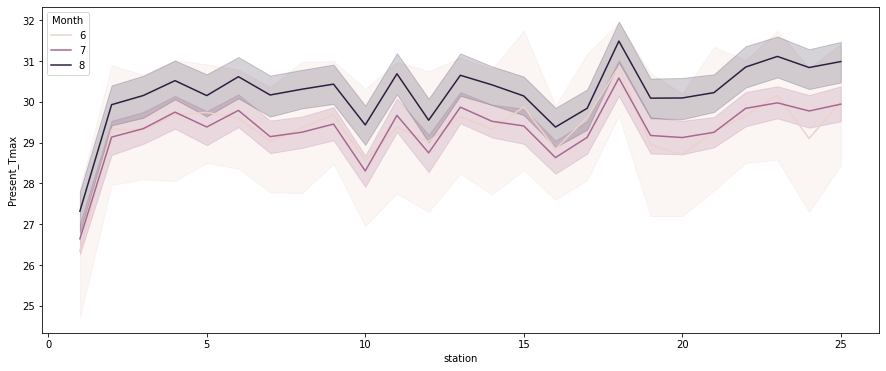

In [63]:
plt.figure(figsize=(15,6))
sns.lineplot(x='station',y='Present_Tmax',hue='Month',data=df)
plt.show()

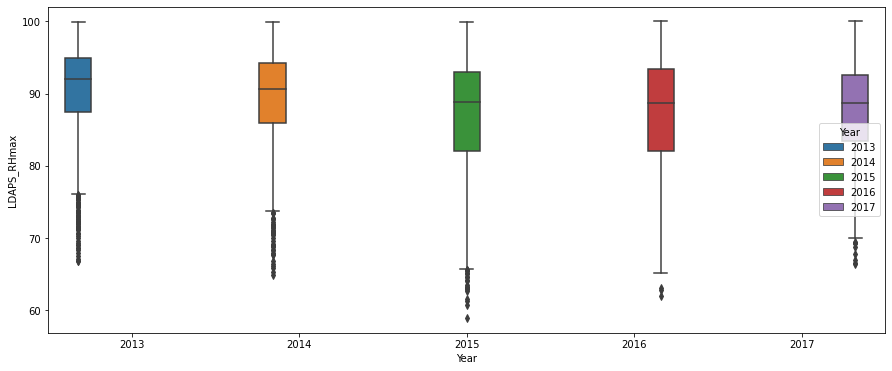

In [66]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Year',y='LDAPS_RHmax',hue='Year',data=df)
plt.show()

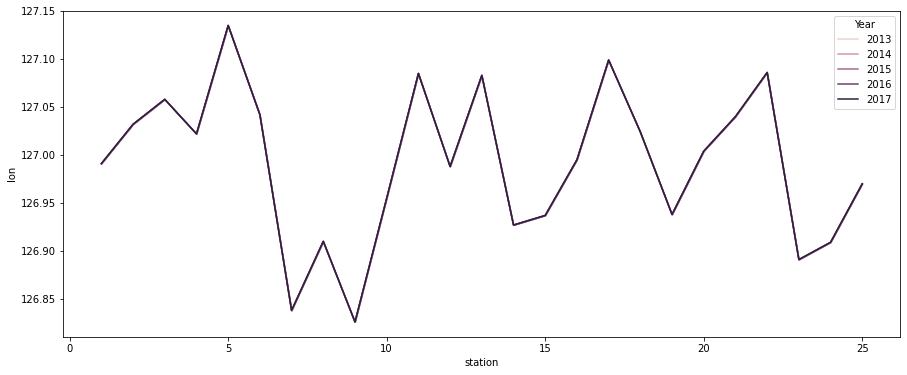

In [72]:
plt.figure(figsize=(15,6))
sns.lineplot(x='station',y='lon',hue='Year',data=df)
plt.show()

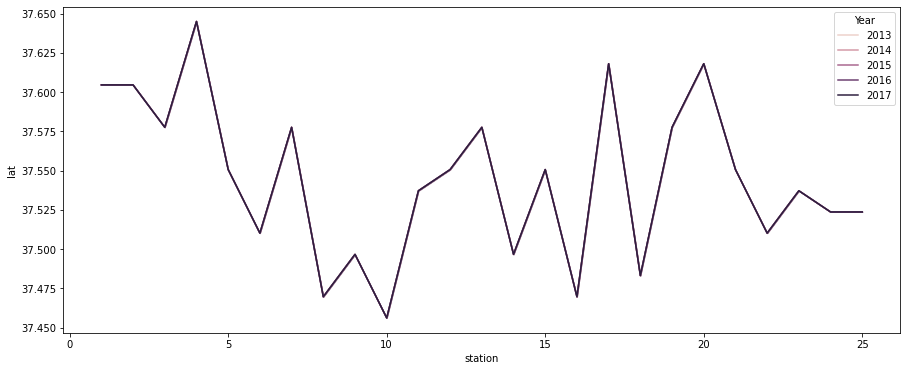

In [73]:
plt.figure(figsize=(15,6))
sns.lineplot(x='station',y='lat',hue='Year',data=df)
plt.show()

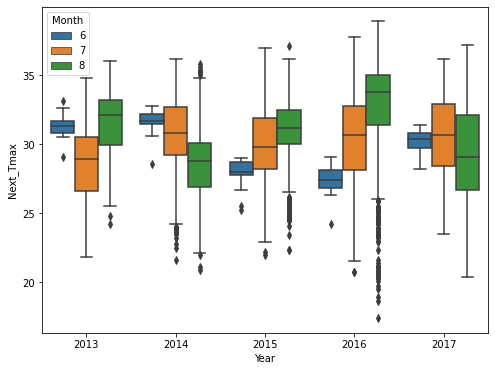

In [74]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Year',y='Next_Tmax',hue='Month',data=df)
plt.show()

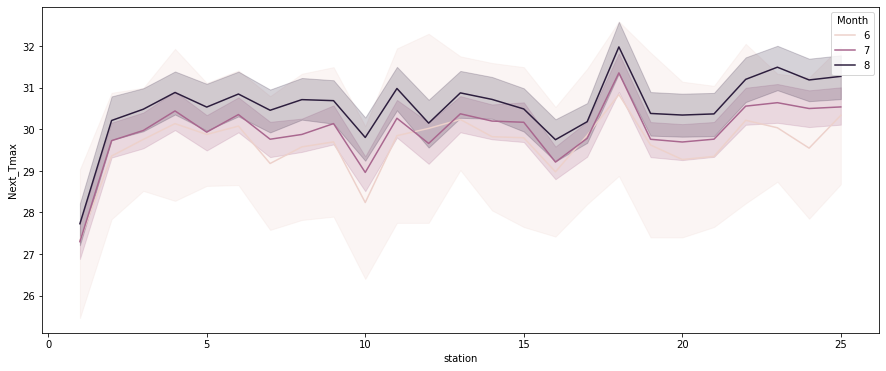

In [76]:
plt.figure(figsize=(15,6))
sns.lineplot(x='station',y='Next_Tmax',hue='Month',data=df)
plt.show()

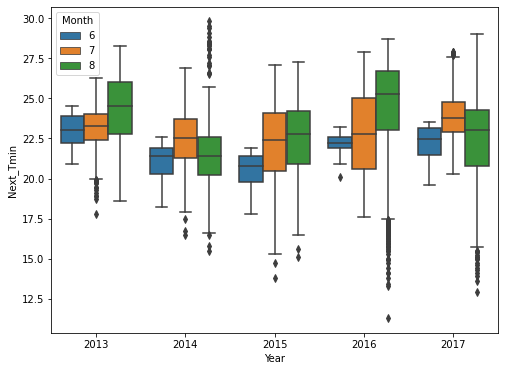

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Year',y='Next_Tmin',hue='Month',data=df)
plt.show()

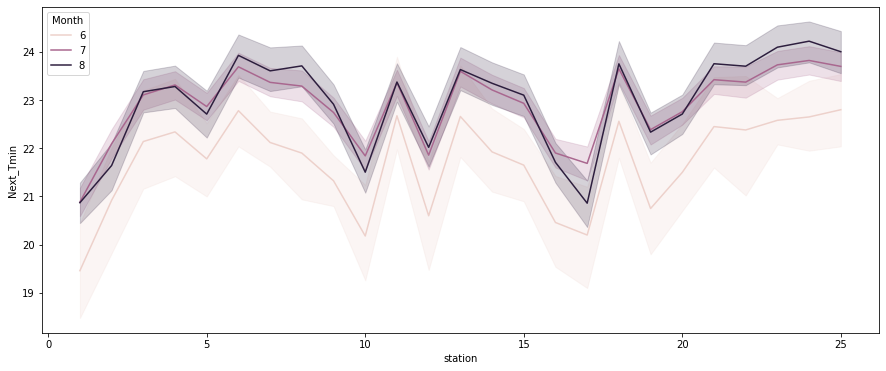

In [77]:
plt.figure(figsize=(15,6))
sns.lineplot(x='station',y='Next_Tmin',hue='Month',data=df)
plt.show()

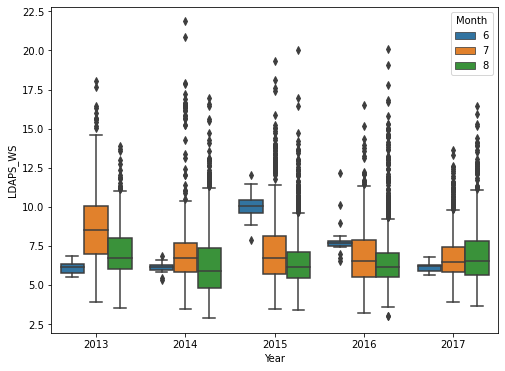

In [78]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Year',y='LDAPS_WS',hue='Month',data=df)
plt.show()

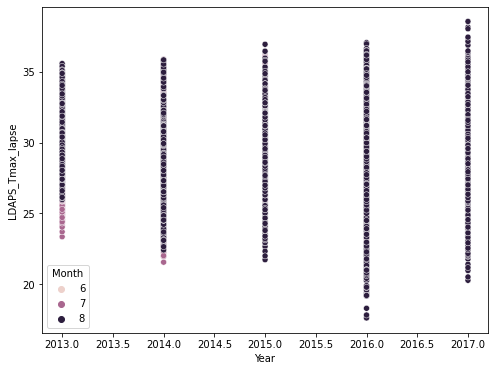

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Year',y='LDAPS_Tmax_lapse',hue='Month',data=df)
plt.show()

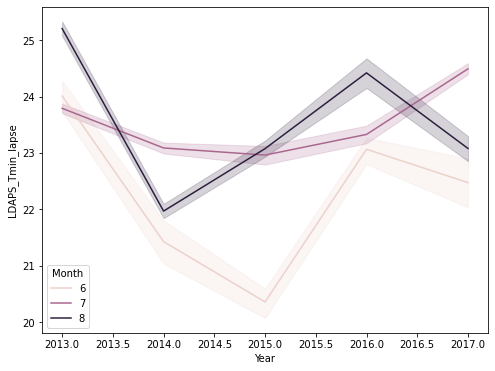

In [83]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year',y='LDAPS_Tmin_lapse',hue='Month',data=df)
plt.show()

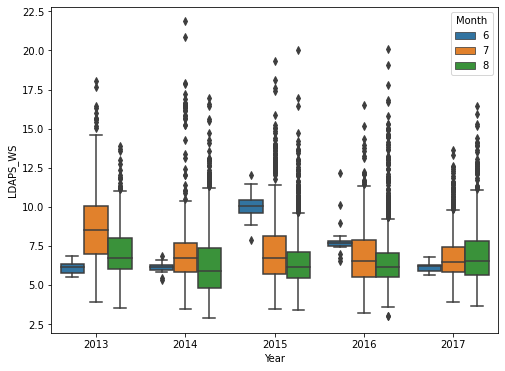

In [57]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Year',y='LDAPS_WS',hue='Month',data=df)
plt.show()

### Statistical Summary:

In [84]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,2014.991697,7.465999,15.939510
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,1.410877,0.528635,8.906521
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,2013.000000,6.000000,1.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,2017.000000,8.000000,31.000000


### Correlation:

In [85]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,0.001474,0.003114,-0.000799
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,0.056002,0.147358,-0.151982
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,0.037457,0.084047,-0.114294
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.002147,-0.190674,-0.060702
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.144286,-0.117317,-0.014242
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,0.020308,0.096915,-0.160191
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.000564,0.023412,-0.171284
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.114114,-0.113617,-0.040088
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,0.055898,0.060947,-0.019588
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.066233,-0.212477,-0.024234


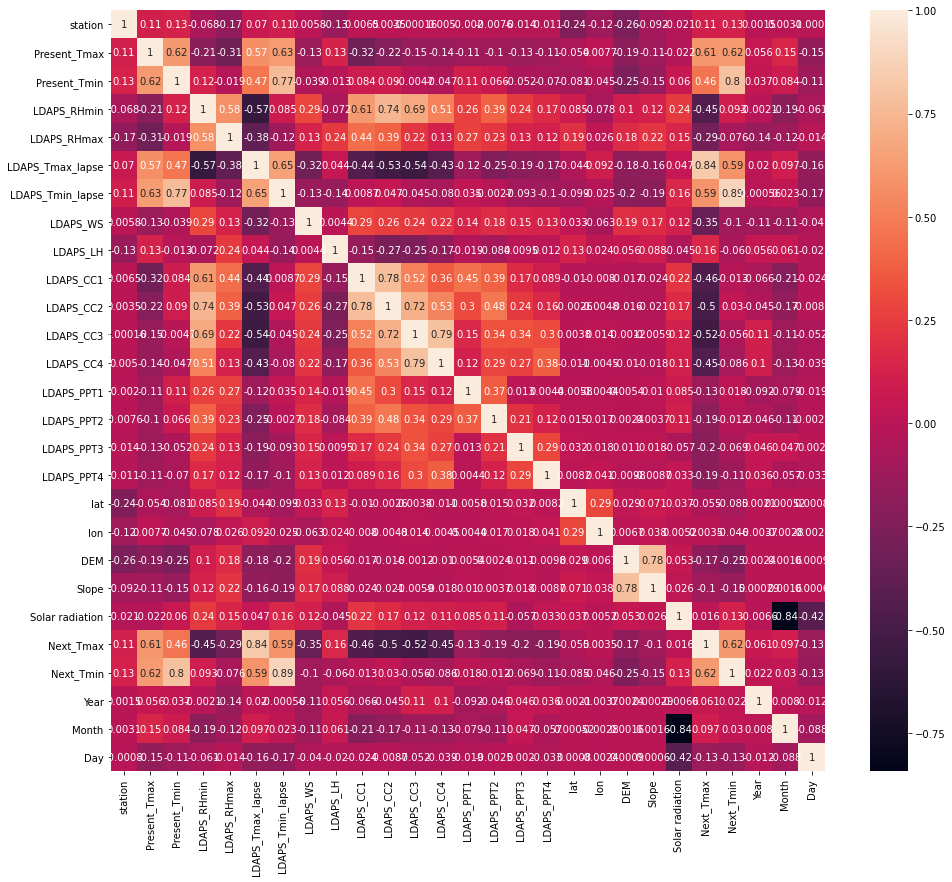

In [86]:
corr_hmap=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Removing Outliers:

In [87]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [88]:
new_df=df[(z<3).all(axis=1)]

In [89]:
new_df.shape

(6739, 27)

In [90]:
df.shape

(7588, 27)

In [91]:
''' Data Loss '''

Data_loss = ((7588-6739)/7588)*100
Data_loss

11.188719030047443

The loss of data after removing the ouliers is 11.18%.

### Skewness:

In [92]:
new_df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.168571
Day                 0.000057
dtype: float64

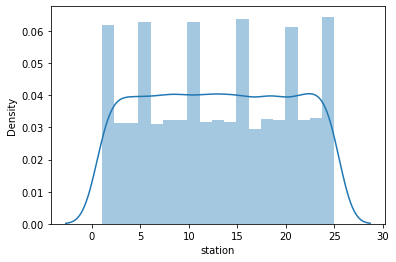

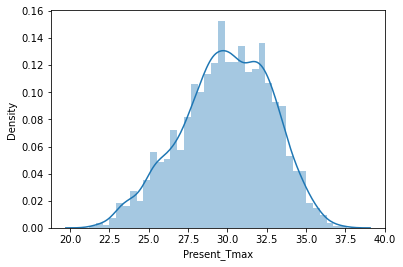

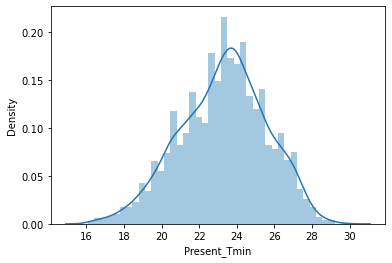

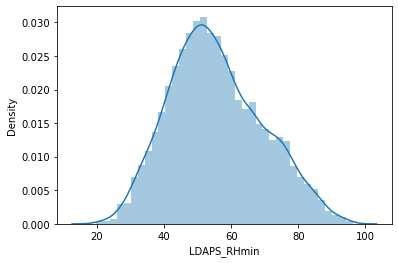

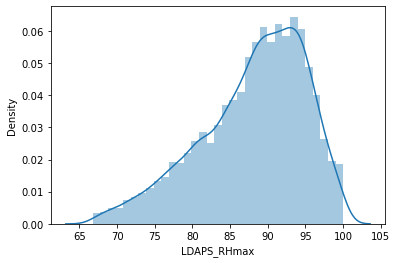

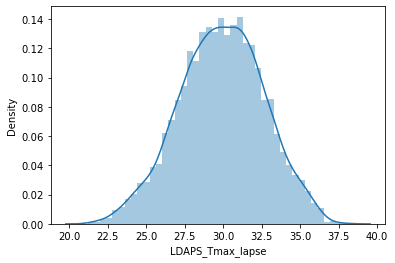

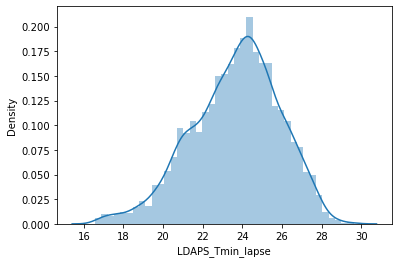

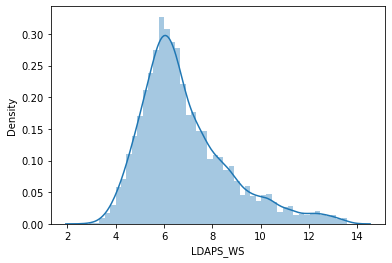

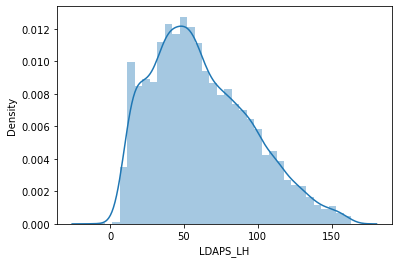

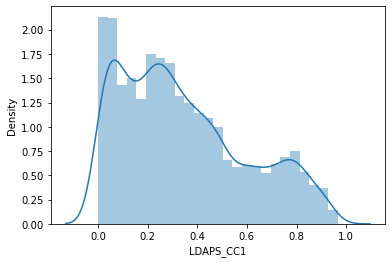

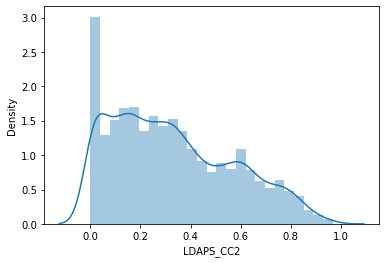

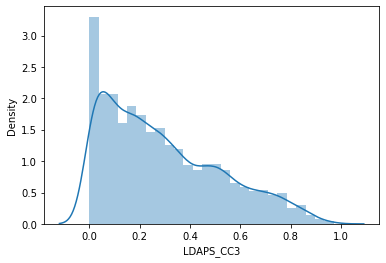

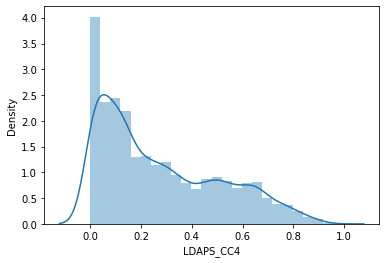

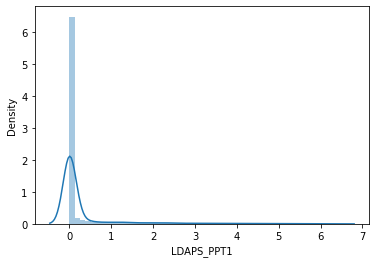

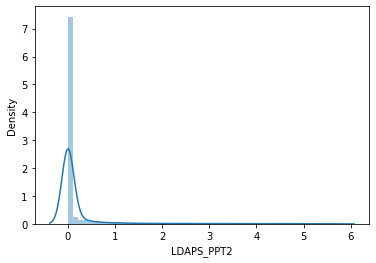

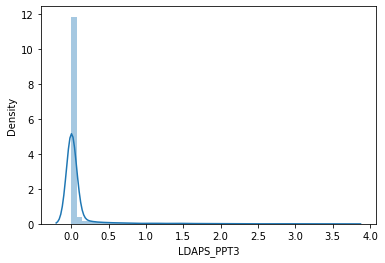

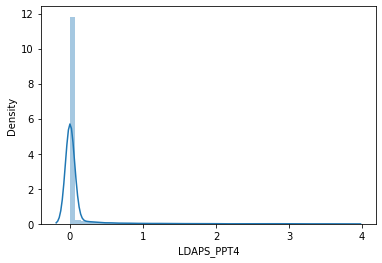

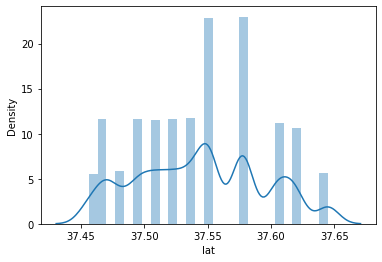

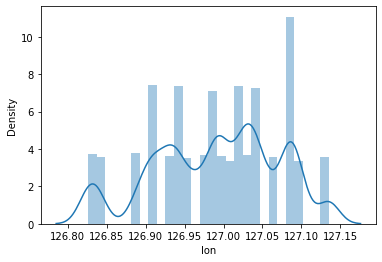

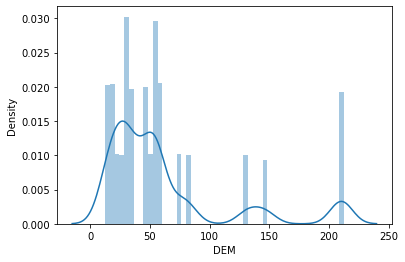

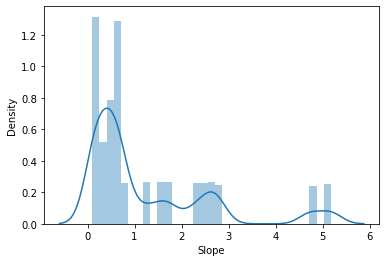

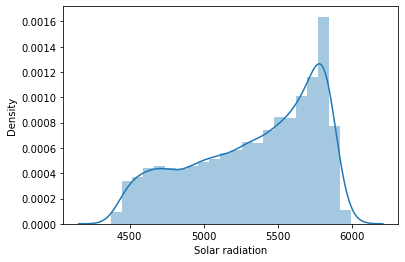

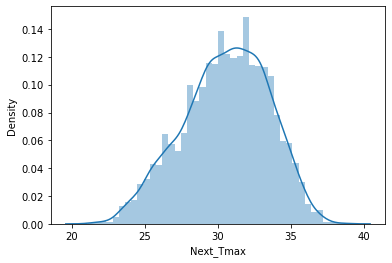

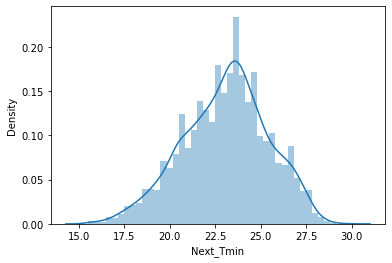

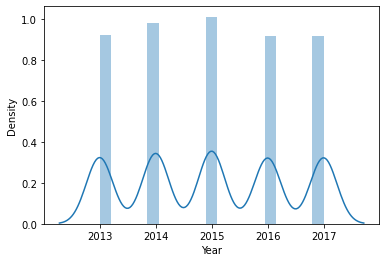

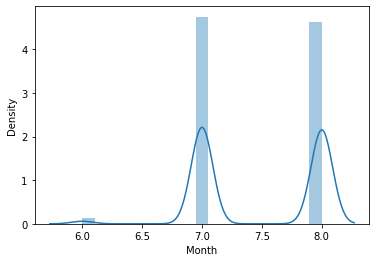

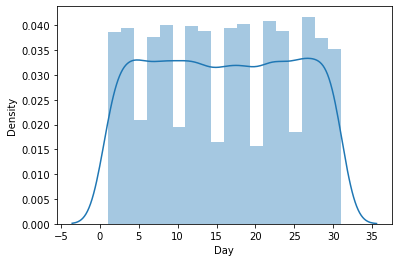

In [93]:
for i in new_df:
    sns.distplot(new_df[i])
    plt.show()

### Removing Skewness:

In [94]:
for i in new_df.columns:
    
    # we are using log transformation method to remove skewness
    if new_df.skew().loc[i]>0.5:
        new_df[i]=np.log1p(new_df[i])
        
        # we are using square method to remove skewness
        if new_df.skew().loc[i]<-0.5:
            new_df[i]=np.square(new_df[i])

In [95]:
new_df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.473278
LDAPS_LH           -0.270876
LDAPS_CC1           0.329077
LDAPS_CC2           0.246509
LDAPS_CC3           0.440898
LDAPS_CC4           0.495420
LDAPS_PPT1          2.745464
LDAPS_PPT2          3.637804
LDAPS_PPT3          4.231731
LDAPS_PPT4          4.602734
lat                 0.106983
lon                -0.277547
DEM                 0.450739
Slope               0.845591
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.168571
Day                 0.000057
dtype: float64

### Spliting the data into Feature and Target:

In [97]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df['Next_Tmax']

In [98]:
x.shape

(7588, 25)

In [99]:
y.shape

(7588,)

In [100]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,2017,8,30
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,2017,8,30
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,2017,8,30
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,2017,8,30


In [101]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7588, dtype: float64

In [102]:
                                       '''  Importing required libraries'''
    
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [103]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("We are getting the Best Accuracy is",maxAccu," on Random_state",maxRS)

We are getting the Best Accuracy is 0.8069859152410079  on Random_state 30


### Train Test Split the data:

Train Test Split the data: We got the Best Accuracy is 0.8069859152410079  on Random_state 30. Hence, using these values we are going to train our data using following models :-

Linear Regression

Decision Tree Regressor

Random Forest Regressor

Lasso

KNeighbors Regressor

GradientBoostingRegressor

SVR

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=30)

In [106]:
x_train.shape

(6070, 25)

In [107]:
x_test.shape

(1518, 25)

In [108]:
y_train.shape

(6070,)

In [109]:
y_test.shape

(1518,)

In [110]:
                                                    ''' Linear Regression '''

lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 81.81592022364923%


In [111]:
                                                    ''' Decision Tree Regressor '''

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 81.08347418852003%


In [112]:
                                                    ''' Random Forest Regressor '''

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 92.3241230122997%


In [113]:
                                                    ''' Lasso '''

ls=Lasso()
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 74.61664660534143%


In [114]:
                                                    ''' KNeighbors Regressor '''

knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 55.30926179268485%


In [115]:
                                                    ''' Gradient Boosting Regressor '''             

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 88.2152168845704%


In [116]:
                                                    ''' SVR '''

svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 4.997439759399425%


### Cross Validation:

In [117]:
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print("Cross Validation Score for Linear Regression is : ",cvlr)

Cross Validation Score for Linear Regression is :  0.6845234234935799


In [118]:
cvdtr=cross_val_score(dtr,x,y,cv=5).mean()
print("Cross Validation Score for Decision Tree Regressor is : ",cvdtr)

Cross Validation Score for Decision Tree Regressor is :  0.43920535485777246


In [119]:
cvrfr=cross_val_score(rfr,x,y,cv=5).mean()
print("Cross Validation Score for Random Forest Regressorr is : ",cvrfr)

Cross Validation Score for Random Forest Regressorr is :  0.6958484532315012


In [120]:
cvls=cross_val_score(ls,x,y,cv=5).mean()
print("Cross Validation Score for Lasso is : ",cvls)

Cross Validation Score for Lasso is :  0.6711224369798068


In [121]:
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print("Cross Validation Score for KNeighborsRegressor is : ",cvknn)

Cross Validation Score for KNeighborsRegressor is :  0.18961067266410858


In [122]:
cvgbr=cross_val_score(gbr,x,y,cv=5).mean()
print("Cross Validation Score for Gradient Boosting Regressor is : ",cvgbr)

Cross Validation Score for Gradient Boosting Regressor is :  0.7142688834766228


In [123]:
cvsvr=cross_val_score(svr,x,y,cv=5).mean()
print("Cross Validation Score for SVR is : ",cvsvr)

Cross Validation Score for SVR is :  -0.06121858510033549


### Overfitting & Underfitting:

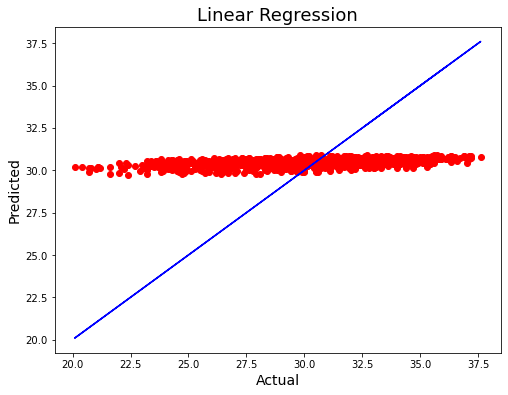

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### Hyper Parameter Tuning:

We are selecting Lasso as our best model as it has least difference between it's Accuracy score and CV score.

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
parameter={'fit_intercept':[.0001,.001,.01,.1,1,10],
          'random_state':list(range(0,10)),
           'selection':['cyclic','random'],
           'max_iter':[50]}

In [127]:
GCV = GridSearchCV(Lasso(),parameter,cv=5)

In [128]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'fit_intercept': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [50],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'selection': ['cyclic', 'random']})

In [129]:
                                ''' Getting the best parameters using GridSearchCV '''

GCV.best_params_

{'fit_intercept': 0.0001,
 'max_iter': 50,
 'random_state': 8,
 'selection': 'random'}

In [130]:
temp_final=Lasso(fit_intercept=0.0001, max_iter= 50, random_state= 8, selection= 'random')
temp_final.fit(x_train,y_train)
pred=temp_final.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

74.61701935195586


### We are getting the model accuracy and cross validation score both as 74.61% which shows our model is performing well.

### Saving the model:

In [132]:
import joblib
joblib.dump(temp_final,"Temperature_Forecast_Project_using_ML.pkl")

['Temperature_Forecast_Project_using_ML.pkl']

In [133]:
temp_model = joblib.load(open('Temperature_Forecast_Project_using_ML.pkl','rb'))
result = temp_model.score(x_test,y_test)
print(result)

0.7461701935195586


In [134]:
Conclusion = pd.DataFrame([temp_model.predict(x_test)[:],ls.predict(x_test)[:]],index=["Predicted","Original"])

In [135]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517
Predicted,31.172532,30.078619,32.029308,35.076341,32.313887,27.904477,28.277827,32.273168,31.005399,27.944371,...,34.079935,28.490426,31.270369,30.752926,28.705241,26.732669,27.825895,28.449994,29.604130,30.902524
Original,31.172345,30.078619,32.029247,35.076342,32.313775,27.904579,28.277586,32.273219,31.005245,27.944055,...,34.079735,28.490669,31.270448,30.752952,28.705276,26.732641,27.825899,28.450127,29.604186,30.902527


                                                           ---- --:-- ----